# Cluster Modeling - Hierarchical Clustering

In [1]:
# load rfm dataframe
import pickle

# data wrangling
import numpy as np
import pandas as pd
import datetime as dt

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

In [2]:
df_hc = pd.read_pickle('./data/rfm_scaled.pkl')

In [3]:
rfm = pd.read_pickle('./data/rfm.pkl')

Using ward method, which is robust to outliers. This method attempts to minimize the variance - sum of the squared internal distances of the points to its cluster center.

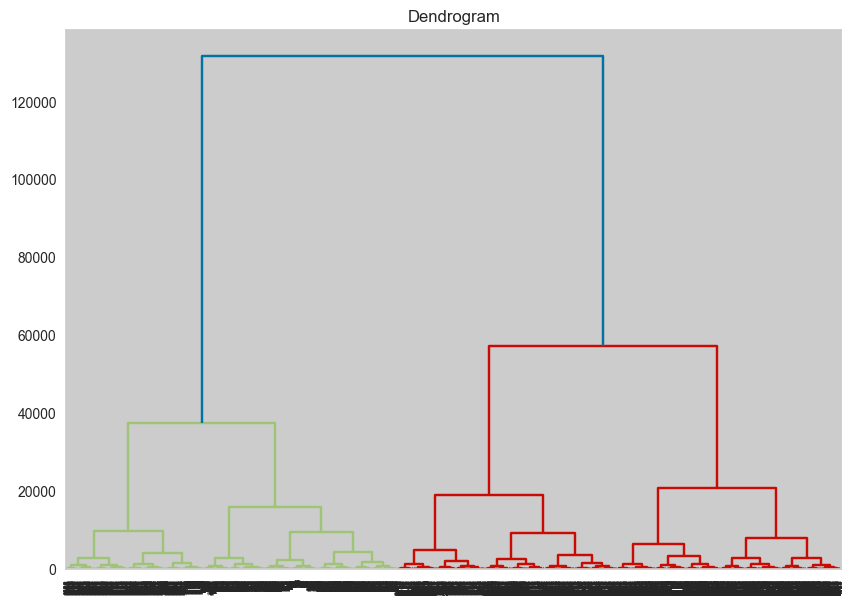

In [4]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrogram")  
dend = shc.dendrogram(shc.linkage(df_hc, method='ward'))

## Agglomerative Clustering based on k = 4

In [10]:
cluster = AgglomerativeClustering(n_clusters=4)  
cluster_labels = cluster.fit_predict(df_hc.drop(columns=['CustomerID']))

In [12]:
df_hc['cluster_label'] = cluster_labels

In [16]:
hier_rfm = pd.merge(rfm, df_hc, on = 'CustomerID')

In [17]:
hier_rfm.head(10)

,CustomerID,R (days),F,M (R$),0,1,2,cluster_label
0,12347,1,7,615.71,-0.914920,0.857420,1.757164,2
1,12348,74,4,449.31,-0.188168,0.084642,0.813643,2
2,12350,309,1,334.40,2.151378,-0.688136,0.162081,1
3,12352,35,8,313.25,-0.576433,1.115013,0.042156,0
4,12353,203,1,89.00,1.096094,-0.688136,-1.229385,1
5,12355,213,1,459.40,1.195649,-0.688136,0.870856,1
6,12358,1,2,584.03,-0.914920,-0.430543,1.577532,2
7,12360,51,3,887.35,-0.417145,-0.172951,3.297416,2
8,12361,286,1,189.90,1.922401,-0.688136,-0.657262,1
9,12362,2,10,522.62,-0.904965,1.630198,1.229325,2


In [18]:
from mpl_toolkits.mplot3d import Axes3D

plot_agg = hier_rfm.drop(columns = ['CustomerID', 0, 1, 2])

plot_agg['R (days)'] = plot_agg['R (days)'].astype(int)
plot_agg['F'] = plot_agg['F'].astype(int)
plot_agg['M (R$)'] = plot_agg['M (R$)'].astype(float).astype(int)

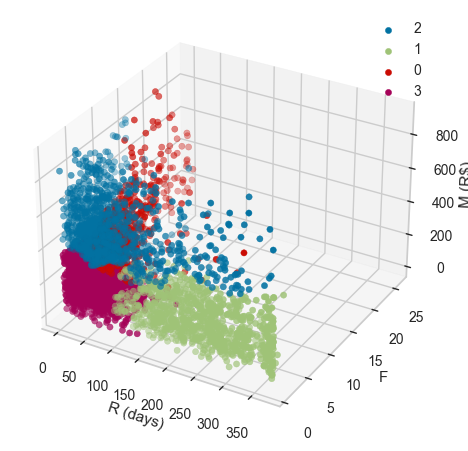

In [20]:
fig = plt.figure() 
ax = Axes3D(fig)
ax = fig.add_subplot(projection='3d')

for l in plot_agg.cluster_label.unique():
    ax.scatter(plot_agg['R (days)'][plot_agg.cluster_label==l],
               plot_agg['F'][plot_agg.cluster_label==l],
               plot_agg['M (R$)'][plot_agg.cluster_label==l],label=l)
    
ax.legend()
ax.set_xlabel('R (days)') 
ax.set_ylabel('F') 
ax.set_zlabel('M (R$)')
plt.show()

In [21]:
hier_rfm[['CustomerID', 'cluster_label']].groupby('cluster_label').count()

,CustomerID
cluster_label,
0,533
1,965
2,1072
3,1505


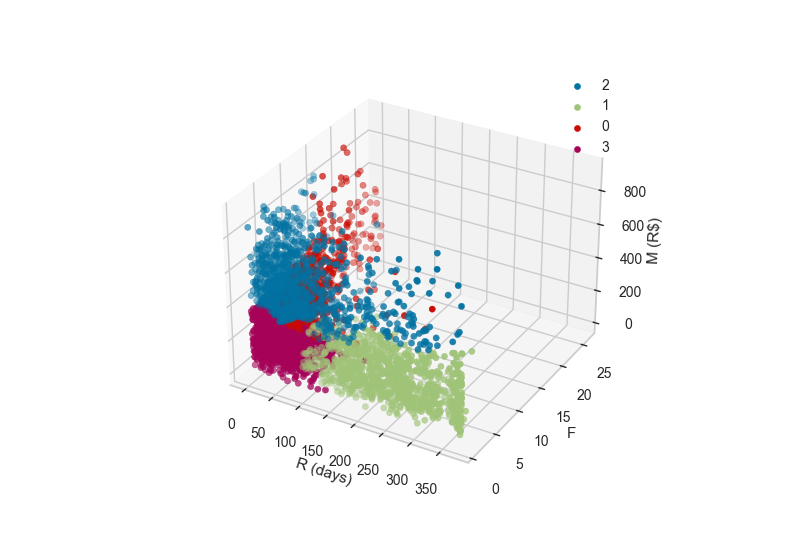

In [22]:
# responsive plot 
%matplotlib widget 

fig = plt.figure() 
ax = Axes3D(fig)
ax = fig.add_subplot(projection='3d')

for l in plot_agg.cluster_label.unique():
    ax.scatter(plot_agg['R (days)'][plot_agg.cluster_label==l],
               plot_agg['F'][plot_agg.cluster_label==l],
               plot_agg['M (R$)'][plot_agg.cluster_label==l],label=l)
    
ax.legend()
ax.set_xlabel('R (days)') 
ax.set_ylabel('F') 
ax.set_zlabel('M (R$)')
plt.show()

### Using Principal Component Analysis (PCA) for dimensionality reduction

In [24]:
pca=PCA(n_components=2)
pc=pca.fit_transform(df_hc.drop(columns = ['CustomerID', 'cluster_label']))

<Axes: xlabel='P1', ylabel='P2'>

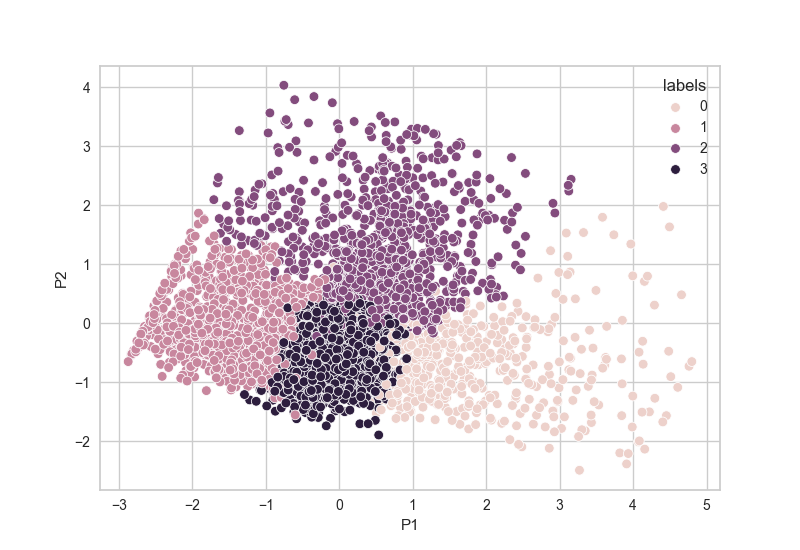

In [26]:
fig = plt.figure()
pc_df=pd.DataFrame(data=pc, columns=['P1', 'P2'])
pc_df['labels']=df_hc['cluster_label']
sns.scatterplot(data=pc_df,x='P1',y='P2',hue='labels')

<Axes: xlabel='M (R$)', ylabel='R (days)'>

<Figure size 800x550 with 0 Axes>

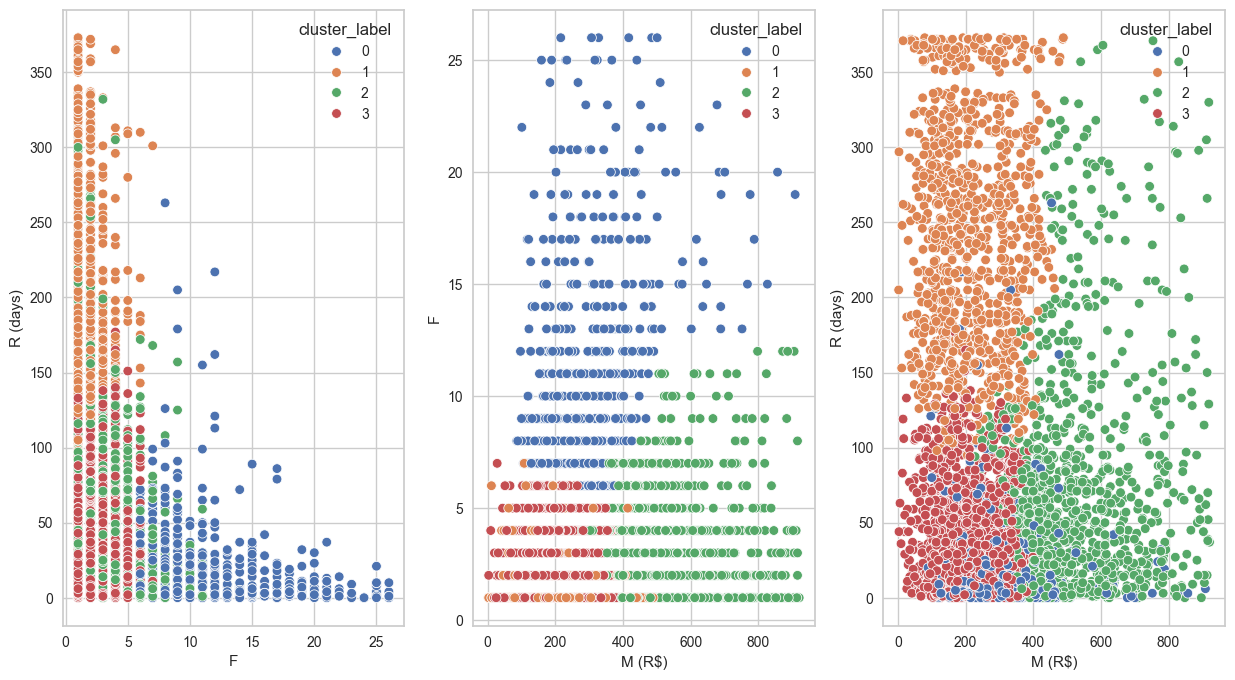

In [30]:
plt.figure()

f, axes = plt.subplots(1, 3,figsize=(15, 8))
sns.scatterplot(data=plot_agg,x='F',y='R (days)',hue='cluster_label',ax=axes[0],palette="deep")
sns.scatterplot(data=plot_agg,x='M (R$)',y='F',hue='cluster_label',ax=axes[1],palette="deep")
sns.scatterplot(data=plot_agg,x='M (R$)',y='R (days)',hue='cluster_label',ax=axes[2],palette="deep")